# Chapter 5: Python for Numerical Computations
An introduction to linear algebra with NumPy and PyTorch
by Pierre Nugues

Programs from the book: [_Python for Natural Language Processing_](https://link.springer.com/book/9783031575488)

__Author__: Pierre Nugues

## The Corpus
We create a dictionary with URLs

In [1]:
classics_url = {'iliad': 'http://classics.mit.edu/Homer/iliad.mb.txt',
                'odyssey': 'http://classics.mit.edu/Homer/odyssey.mb.txt',
                'eclogue': 'http://classics.mit.edu/Virgil/eclogue.mb.txt',
                'georgics': 'http://classics.mit.edu/Virgil/georgics.mb.txt',
                'aeneid': 'http://classics.mit.edu/Virgil/aeneid.mb.txt'}

We read the texts from the URLs

In [2]:
import requests

classics = {}
for key in classics_url:
    classics[key] = requests.get(classics_url[key], verify=False).text

We remove the license information to keep only the text

In [3]:
import regex as re

In [4]:
for key in classics:
    classics[key] = re.search(r'^-+$(.+)^-+$',
                              classics[key],
                              re.M | re.S).group(1)

In [5]:
classics['iliad'][:50]

'\n\nBOOK I\n\nSing, O goddess, the anger of Achilles s'

We additionally write the _Iliad_ and the _Odyssey_ in two text files

In [6]:
PATH = '../datasets/classics/'

In [7]:
with open(PATH + 'iliad.txt', 'w') as f_il, open(PATH + 'odyssey.txt', 'w') as f_od:
    f_il.write(classics['iliad'])
    f_od.write(classics['odyssey'])

We store the corpus in a JSON file

In [8]:
import json

In [9]:
with open(PATH + 'homer.json', 'w') as f:
    json.dump(classics, f)

We read it again

In [10]:
with open(PATH + 'homer.json', 'r') as f:
    classics = json.loads(f.read())

## Utilities

In [11]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'

In [12]:
class Text:
    """Text class to hold and process text"""

    alphabet = 'abcdefghijklmnopqrstuvwxyz'

    def __init__(self, text: str = None):
        """The constructor called when an object
        is created"""

        self.content = text
        self.length = len(text)
        self.letter_counts = {}

    def count_letters(self, lc: bool = True) -> dict[str, int]:
        """Function to count the letters of a text"""

        letter_counts = {}
        if lc:
            text = self.content.lower()
        else:
            text = self.content
        for letter in text:
            if letter.lower() in self.alphabet:
                if letter in letter_counts:
                    letter_counts[letter] += 1
                else:
                    letter_counts[letter] = 1
        self.letter_counts = letter_counts
        return letter_counts

## Imports

In [13]:
import math
import random
import numpy as np
import torch

In [14]:
random.seed(4321)
np.random.seed(4321)
torch.manual_seed(4321)

## The Dataset

Let us read Homer's _Iliad_ and _Odyssey_ and Virgil's _Eclogue_, _Georgics_, and _Aeneid_.

In [15]:
titles = list(classics.keys())
titles

['iliad', 'odyssey', 'eclogue', 'georgics', 'aeneid']

In [16]:
texts = []
for title in titles:
    texts += [classics[title]]

In [17]:
cnt_dicts = []
for text in texts:
    cnt_dicts += [Text(text).count_letters()]

In [18]:
cnt_lists = []
for cnt_dict in cnt_dicts:
    cnt_lists += [list(map(lambda x: cnt_dict.get(x, 0),
                           alphabet))]

In [19]:
cnt_lists[0][:3]

[51016, 8938, 11558]

In [20]:
for i, cnt_list in enumerate(cnt_lists):
    print(titles[i], cnt_lists[i][:10])

iliad [51016, 8938, 11558, 28331, 77461, 16114, 12595, 50192, 38149, 1624]
odyssey [37627, 6595, 8580, 20736, 59777, 10449, 9803, 34785, 28793, 424]
eclogue [2716, 577, 722, 1440, 4363, 846, 806, 2508, 2250, 22]
georgics [6841, 1618, 2016, 4027, 12110, 2424, 2147, 6987, 6035, 59]
aeneid [36675, 6867, 10023, 23862, 55367, 11618, 9606, 33055, 30576, 907]


## Vectors
### NumPy

In [21]:
np.array([2, 3])
np.array([1, 2, 3])

array([1, 2, 3])

Vectors of letter counts

In [22]:
iliad_cnt = np.array(cnt_lists[0])
odyssey_cnt = np.array(cnt_lists[1])
eclogue_cnt = np.array(cnt_lists[2])
georgics_cnt = np.array(cnt_lists[3])
aeneid_cnt = np.array(cnt_lists[4])

In [23]:
iliad_cnt

array([51016,  8938, 11558, 28331, 77461, 16114, 12595, 50192, 38149,
        1624,  4413, 25307, 16646, 42193, 51269,  9104,   283, 36454,
       41241, 54173, 18407,  6060, 15665,   597, 11906,   284])

In [24]:
odyssey_cnt

array([37627,  6595,  8580, 20736, 59777, 10449,  9803, 34785, 28793,
         424,  3631, 18948, 13058, 31888, 38776,  6679,   256, 25665,
       31348, 40479, 15404,  4803, 12989,   350, 10970,   124])

### The datatype

In [25]:
odyssey_cnt.dtype

dtype('int64')

In [26]:
vector = np.array([1, 2, 3], dtype='int32')
vector

array([1, 2, 3], dtype=int32)

In [27]:
vector.dtype

dtype('int32')

In [28]:
vector = np.array([1, 2, 3], dtype='float64')
vector

array([1., 2., 3.])

In [29]:
np.array([0, 1, 2, 3], dtype='bool')

array([False,  True,  True,  True])

### The vector size

In [30]:
odyssey_cnt.shape

(26,)

### Indices and Slices

In [31]:
vector = np.array([1, 2, 3, 4])
vector[1]   # 2
vector[:1]  # array([1])
vector[1:3]  # array([2, 3])

array([2, 3])

### Operations

In [32]:
np.array([1, 2, 3]) + np.array([4, 5, 6])

array([5, 7, 9])

In [33]:
3 * np.array([1, 2, 3])

array([3, 6, 9])

In [34]:
iliad_cnt + odyssey_cnt      # array([88643,  15533,  20138, ...])

array([ 88643,  15533,  20138,  49067, 137238,  26563,  22398,  84977,
        66942,   2048,   8044,  44255,  29704,  74081,  90045,  15783,
          539,  62119,  72589,  94652,  33811,  10863,  28654,    947,
        22876,    408])

In [35]:
iliad_cnt - odyssey_cnt      # array([13389,  2343,  2978, ...])

array([13389,  2343,  2978,  7595, 17684,  5665,  2792, 15407,  9356,
        1200,   782,  6359,  3588, 10305, 12493,  2425,    27, 10789,
        9893, 13694,  3003,  1257,  2676,   247,   936,   160])

In [36]:

iliad_cnt - 2 * odyssey_cnt  # array([-24238,  -4252,  ...])

array([-24238,  -4252,  -5602, -13141, -42093,  -4784,  -7011, -19378,
       -19437,    776,  -2849, -12589,  -9470, -21583, -26283,  -4254,
         -229, -14876, -21455, -26785, -12401,  -3546, -10313,   -103,
       -10034,     36])

### Comparison with lists

In [37]:
[1, 2, 3] + [4, 5, 6]

[1, 2, 3, 4, 5, 6]

In [38]:
3 * [1, 2, 3]

[1, 2, 3, 1, 2, 3, 1, 2, 3]

### PyTorch
#### Tensors

In [39]:
torch.tensor([2, 3])
torch.tensor([1, 2, 3])

tensor([1, 2, 3])

In [40]:
iliad_cnt_pt = torch.tensor(cnt_lists[0])

In [41]:
iliad_cnt_pt

tensor([51016,  8938, 11558, 28331, 77461, 16114, 12595, 50192, 38149,  1624,
         4413, 25307, 16646, 42193, 51269,  9104,   283, 36454, 41241, 54173,
        18407,  6060, 15665,   597, 11906,   284])

#### Types

In [42]:
torch.tensor([1, 2, 3]).dtype

torch.int64

In [43]:
torch.tensor([1, 2, 3], dtype=torch.float64)

tensor([1., 2., 3.], dtype=torch.float64)

In [44]:
torch.tensor([0, 1, 2, 3], dtype=torch.bool)

tensor([False,  True,  True,  True])

#### Size

In [45]:
iliad_cnt_pt.size()

torch.Size([26])

#### NumPy/PyTorch Conversion

In [46]:
np_array = np.array([1, 2, 3])
tensor = torch.from_numpy(np_array)
tensor

tensor([1, 2, 3])

In [47]:
tensor = torch.tensor([1, 2, 3])
np_array = tensor.numpy()
np_array

array([1, 2, 3])

#### Device

In [48]:
torch.cuda.is_available()

False

In [49]:
torch.backends.mps.is_available()

True

In [50]:
torch.device('cpu')

device(type='cpu')

In [51]:
torch.device('mps')

device(type='mps')

In [52]:
tensor = torch.tensor([1, 2, 3])
tensor.device

device(type='cpu')

In [53]:
if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

In [54]:
device

device(type='mps')

In [55]:
tensor = torch.tensor([1, 2, 3], device=device)
tensor

tensor([1, 2, 3], device='mps:0')

In [56]:
tensor = torch.tensor([1, 2, 3])
tensor.to(device)

tensor([1, 2, 3], device='mps:0')

## NumPy Functions

In [57]:
np.set_printoptions(precision=3)

In [58]:
np.sqrt(iliad_cnt)

array([225.867,  94.541, 107.508, 168.318, 278.318, 126.941, 112.227,
       224.036, 195.318,  40.299,  66.43 , 159.082, 129.019, 205.409,
       226.427,  95.415,  16.823, 190.929, 203.079, 232.751, 135.672,
        77.846, 125.16 ,  24.434, 109.115,  16.852])

In [59]:
np.cos(iliad_cnt)

array([-0.948, -0.986, -0.997,  0.993, -0.315, -0.717, -0.938, -0.338,
       -0.802, -0.979, -0.592, -0.099, -0.268,  0.159, -0.22 ,  0.944,
        0.967,  0.505, -0.255,  0.812, -0.918, -0.991,  0.524,  0.995,
        0.804,  0.309])

In [60]:
math.sqrt(iliad_cnt)

TypeError: only length-1 arrays can be converted to Python scalars

In [61]:
np_sqrt = np.vectorize(math.sqrt)
np_sqrt(iliad_cnt)

array([225.867,  94.541, 107.508, 168.318, 278.318, 126.941, 112.227,
       224.036, 195.318,  40.299,  66.43 , 159.082, 129.019, 205.409,
       226.427,  95.415,  16.823, 190.929, 203.079, 232.751, 135.672,
        77.846, 125.16 ,  24.434, 109.115,  16.852])

In [62]:
np.sum(odyssey_cnt)

472937

In [63]:
iliad_dist = iliad_cnt / np.sum(iliad_cnt)
odyssey_dist = odyssey_cnt / np.sum(odyssey_cnt)

In [64]:
iliad_dist

array([0.081, 0.014, 0.018, 0.045, 0.123, 0.026, 0.02 , 0.08 , 0.061,
       0.003, 0.007, 0.04 , 0.026, 0.067, 0.081, 0.014, 0.   , 0.058,
       0.065, 0.086, 0.029, 0.01 , 0.025, 0.001, 0.019, 0.   ])

In [65]:
odyssey_dist

array([0.08 , 0.014, 0.018, 0.044, 0.126, 0.022, 0.021, 0.074, 0.061,
       0.001, 0.008, 0.04 , 0.028, 0.067, 0.082, 0.014, 0.001, 0.054,
       0.066, 0.086, 0.033, 0.01 , 0.027, 0.001, 0.023, 0.   ])

PyTorch

In [66]:
torch.sqrt(iliad_cnt_pt)

tensor([225.8672,  94.5410, 107.5081, 168.3181, 278.3182, 126.9409, 112.2274,
        224.0357, 195.3177,  40.2989,  66.4304, 159.0817, 129.0194, 205.4093,
        226.4266,  95.4149,  16.8226, 190.9293, 203.0788, 232.7509, 135.6724,
         77.8460, 125.1599,  24.4336, 109.1146,  16.8523])

In [67]:
torch.sum(iliad_cnt_pt)

tensor(629980)

## Dot Product


In [68]:
np.dot(iliad_dist, odyssey_dist)

0.06581149298284382

In [69]:
iliad_dist @ odyssey_dist

0.06581149298284382

In [70]:
torch.dot(torch.tensor(iliad_dist), torch.tensor(odyssey_dist))

tensor(0.0658, dtype=torch.float64)

### Norm

In [71]:
np.linalg.norm([1.0, 2.0, 3.0])

3.7416573867739413

In [72]:
torch.linalg.vector_norm(torch.tensor([1.0, 2.0, 3.0]))

tensor(3.7417)

#### Cosine

Finally, we compute the cosine 
$$
\frac{\mathbf{x} \cdot \mathbf{y}}{||\mathbf{x}|| . ||\mathbf{y}||}.
$$

In [73]:
(iliad_dist @ odyssey_dist) / (
    np.linalg.norm(iliad_dist) *
    np.linalg.norm(odyssey_dist))

0.9990787113863586

## Matrices

### NumPy

We create a matrix from the list of lists

In [74]:
hv_cnts = np.array(cnt_lists)
hv_cnts

array([[51016,  8938, 11558, 28331, 77461, 16114, 12595, 50192, 38149,
         1624,  4413, 25307, 16646, 42193, 51269,  9104,   283, 36454,
        41241, 54173, 18407,  6060, 15665,   597, 11906,   284],
       [37627,  6595,  8580, 20736, 59777, 10449,  9803, 34785, 28793,
          424,  3631, 18948, 13058, 31888, 38776,  6679,   256, 25665,
        31348, 40479, 15404,  4803, 12989,   350, 10970,   124],
       [ 2716,   577,   722,  1440,  4363,   846,   806,  2508,  2250,
           22,   268,  1807,  1043,  2248,  2947,   569,    12,  2235,
         2617,  2939,  1030,   360,  1023,    38,   905,    22],
       [ 6841,  1618,  2016,  4027, 12110,  2424,  2147,  6987,  6035,
           59,   782,  4308,  2027,  6552,  6957,  1669,    53,  6702,
         7142,  8712,  2583,   902,  2480,    85,  1457,    64],
       [36675,  6867, 10023, 23862, 55367, 11618,  9606, 33055, 30576,
          907,  2702, 18766, 10201, 32254, 32594,  8343,   530, 32074,
        36429, 39478, 13714,  

The size

In [75]:
hv_cnts.shape

(5, 26)

The data type

In [76]:
hv_cnts.dtype

dtype('int64')

### Indices and Slices

In [77]:
iliad_cnt[2]

11558

In [78]:
hv_cnts[1, 2]

8580

Slices

In [79]:
hv_cnts[:, 2]

array([11558,  8580,   722,  2016, 10023])

In [80]:
hv_cnts[1, :]

array([37627,  6595,  8580, 20736, 59777, 10449,  9803, 34785, 28793,
         424,  3631, 18948, 13058, 31888, 38776,  6679,   256, 25665,
       31348, 40479, 15404,  4803, 12989,   350, 10970,   124])

In [81]:
hv_cnts[1, :2]

array([37627,  6595])

In [82]:
hv_cnts[3, 2:4]

array([2016, 4027])

In [83]:
hv_cnts[3:, 2:4]

array([[ 2016,  4027],
       [10023, 23862]])

### Number of indices

In [84]:
odyssey_cnt.ndim

1

In [85]:
hv_cnts.ndim

2

## Addition and multiplication by a scalar

In [86]:
hv_cnts - 2 * hv_cnts

array([[-51016,  -8938, -11558, -28331, -77461, -16114, -12595, -50192,
        -38149,  -1624,  -4413, -25307, -16646, -42193, -51269,  -9104,
          -283, -36454, -41241, -54173, -18407,  -6060, -15665,   -597,
        -11906,   -284],
       [-37627,  -6595,  -8580, -20736, -59777, -10449,  -9803, -34785,
        -28793,   -424,  -3631, -18948, -13058, -31888, -38776,  -6679,
          -256, -25665, -31348, -40479, -15404,  -4803, -12989,   -350,
        -10970,   -124],
       [ -2716,   -577,   -722,  -1440,  -4363,   -846,   -806,  -2508,
         -2250,    -22,   -268,  -1807,  -1043,  -2248,  -2947,   -569,
           -12,  -2235,  -2617,  -2939,  -1030,   -360,  -1023,    -38,
          -905,    -22],
       [ -6841,  -1618,  -2016,  -4027, -12110,  -2424,  -2147,  -6987,
         -6035,    -59,   -782,  -4308,  -2027,  -6552,  -6957,  -1669,
           -53,  -6702,  -7142,  -8712,  -2583,   -902,  -2480,    -85,
         -1457,    -64],
       [-36675,  -6867, -10023, -238

### PyTorch

In [87]:
hv_cnts_pt = torch.tensor(cnt_lists)
hv_cnts_pt

tensor([[51016,  8938, 11558, 28331, 77461, 16114, 12595, 50192, 38149,  1624,
          4413, 25307, 16646, 42193, 51269,  9104,   283, 36454, 41241, 54173,
         18407,  6060, 15665,   597, 11906,   284],
        [37627,  6595,  8580, 20736, 59777, 10449,  9803, 34785, 28793,   424,
          3631, 18948, 13058, 31888, 38776,  6679,   256, 25665, 31348, 40479,
         15404,  4803, 12989,   350, 10970,   124],
        [ 2716,   577,   722,  1440,  4363,   846,   806,  2508,  2250,    22,
           268,  1807,  1043,  2248,  2947,   569,    12,  2235,  2617,  2939,
          1030,   360,  1023,    38,   905,    22],
        [ 6841,  1618,  2016,  4027, 12110,  2424,  2147,  6987,  6035,    59,
           782,  4308,  2027,  6552,  6957,  1669,    53,  6702,  7142,  8712,
          2583,   902,  2480,    85,  1457,    64],
        [36675,  6867, 10023, 23862, 55367, 11618,  9606, 33055, 30576,   907,
          2702, 18766, 10201, 32254, 32594,  8343,   530, 32074, 36429, 39478,
  

In [88]:
hv_cnts_pt.dtype

torch.int64

In [89]:
hv_cnts_pt.dim()

2

In [90]:
hv_cnts_pt.size()

torch.Size([5, 26])

In [91]:
hv_cnts_pt.size(dim=0)   # 5

5

In [92]:
hv_cnts_pt.size(dim=1)   # 26

26

In [93]:
hv_cnts_pt.size(dim=-1)  # 26

26

In [94]:
hv_cnts_pt.size(dim=-2)

5

### NumPy Functions

In [95]:
np.set_printoptions(precision=3)

In [96]:
np.cos(hv_cnts)

array([[-0.948, -0.986, -0.997,  0.993, -0.315, -0.717, -0.938, -0.338,
        -0.802, -0.979, -0.592, -0.099, -0.268,  0.159, -0.22 ,  0.944,
         0.967,  0.505, -0.255,  0.812, -0.918, -0.991,  0.524,  0.995,
         0.804,  0.309],
       [-0.99 , -0.699, -0.952,  0.082,  0.339,  0.998,  0.333,  0.281,
        -0.954, -0.993,  0.777, -0.493,  0.03 ,  0.671, -0.779,  1.   ,
        -0.04 , -0.239,  0.373, -0.913, -0.717, -0.88 , -0.085, -0.284,
         0.904, -0.093],
       [-0.093,  0.495,  0.844,  0.408, -0.782, -0.613, -0.18 ,  0.533,
         0.814, -1.   , -0.57 , -0.834,  1.   ,  0.189,  0.983, -0.932,
         0.844, -0.241, -0.999,  0.04 ,  0.904, -0.284,  0.4  ,  0.955,
         0.976, -1.   ],
       [ 0.181, -0.997,  0.62 ,  0.867, -0.668,  0.258, -0.275,  0.995,
        -1.   , -0.771, -0.967, -0.64 , -0.782,  0.207,  0.057, -0.686,
        -0.918, -0.555, -0.399, -0.935,  0.819, -0.935, -0.283, -0.984,
         0.765,  0.392],
       [ 0.999,  0.867,  0.249,  0.0

In [97]:
np.sum(hv_cnts)

1705964

In [98]:
np.sum(hv_cnts, axis=0)

array([134875,  24595,  32899,  78396, 209078,  41451,  34957, 127527,
       105803,   3036,  11796,  69136,  42975, 115135, 132543,  26364,
         1134, 103130, 118777, 145781,  51138,  16499,  43254,   1630,
        33291,    764])

In [99]:
np.sum(hv_cnts, axis=1)

array([629980, 472937,  36313,  96739, 469995])

### PyTorch

In [100]:
torch.sum(hv_cnts_pt)

tensor(1705964)

In [101]:
torch.sum(hv_cnts_pt, dim=0)  # array([ 134885,  24605,  32901, ...])

tensor([134875,  24595,  32899,  78396, 209078,  41451,  34957, 127527, 105803,
          3036,  11796,  69136,  42975, 115135, 132543,  26364,   1134, 103130,
        118777, 145781,  51138,  16499,  43254,   1630,  33291,    764])

In [102]:
torch.sum(hv_cnts_pt, dim=1)  # array([630019, 472978,  36332,  96758, 470034])

tensor([629980, 472937,  36313,  96739, 469995])

### Transposing and Reshaping Arrays

In [103]:
hv_cnts.T

array([[51016, 37627,  2716,  6841, 36675],
       [ 8938,  6595,   577,  1618,  6867],
       [11558,  8580,   722,  2016, 10023],
       [28331, 20736,  1440,  4027, 23862],
       [77461, 59777,  4363, 12110, 55367],
       [16114, 10449,   846,  2424, 11618],
       [12595,  9803,   806,  2147,  9606],
       [50192, 34785,  2508,  6987, 33055],
       [38149, 28793,  2250,  6035, 30576],
       [ 1624,   424,    22,    59,   907],
       [ 4413,  3631,   268,   782,  2702],
       [25307, 18948,  1807,  4308, 18766],
       [16646, 13058,  1043,  2027, 10201],
       [42193, 31888,  2248,  6552, 32254],
       [51269, 38776,  2947,  6957, 32594],
       [ 9104,  6679,   569,  1669,  8343],
       [  283,   256,    12,    53,   530],
       [36454, 25665,  2235,  6702, 32074],
       [41241, 31348,  2617,  7142, 36429],
       [54173, 40479,  2939,  8712, 39478],
       [18407, 15404,  1030,  2583, 13714],
       [ 6060,  4803,   360,   902,  4374],
       [15665, 12989,  1023,  24

In [104]:
iliad_cnt.T

array([51016,  8938, 11558, 28331, 77461, 16114, 12595, 50192, 38149,
        1624,  4413, 25307, 16646, 42193, 51269,  9104,   283, 36454,
       41241, 54173, 18407,  6060, 15665,   597, 11906,   284])

In [105]:
np.array([iliad_cnt])

array([[51016,  8938, 11558, 28331, 77461, 16114, 12595, 50192, 38149,
         1624,  4413, 25307, 16646, 42193, 51269,  9104,   283, 36454,
        41241, 54173, 18407,  6060, 15665,   597, 11906,   284]])

In [106]:
np.array([iliad_cnt]).shape

(1, 26)

In [107]:
np.array([iliad_cnt]).T

array([[51016],
       [ 8938],
       [11558],
       [28331],
       [77461],
       [16114],
       [12595],
       [50192],
       [38149],
       [ 1624],
       [ 4413],
       [25307],
       [16646],
       [42193],
       [51269],
       [ 9104],
       [  283],
       [36454],
       [41241],
       [54173],
       [18407],
       [ 6060],
       [15665],
       [  597],
       [11906],
       [  284]])

In [108]:
iliad_cnt.reshape(1, -1)

array([[51016,  8938, 11558, 28331, 77461, 16114, 12595, 50192, 38149,
         1624,  4413, 25307, 16646, 42193, 51269,  9104,   283, 36454,
        41241, 54173, 18407,  6060, 15665,   597, 11906,   284]])

In [109]:
iliad_cnt.reshape(-1, 1)

array([[51016],
       [ 8938],
       [11558],
       [28331],
       [77461],
       [16114],
       [12595],
       [50192],
       [38149],
       [ 1624],
       [ 4413],
       [25307],
       [16646],
       [42193],
       [51269],
       [ 9104],
       [  283],
       [36454],
       [41241],
       [54173],
       [18407],
       [ 6060],
       [15665],
       [  597],
       [11906],
       [  284]])

In [110]:
torch.unsqueeze(torch.tensor([1, 2, 3]), 1)

tensor([[1],
        [2],
        [3]])

### Broadcasting

Relative frequencies of the letter counts

In [111]:
iliad_dist = (1/np.sum(iliad_cnt)) * iliad_cnt
odyssey_dist = (1/np.sum(odyssey_cnt)) * odyssey_cnt

In [112]:
iliad_cnt / np.sum(iliad_cnt)

array([0.081, 0.014, 0.018, 0.045, 0.123, 0.026, 0.02 , 0.08 , 0.061,
       0.003, 0.007, 0.04 , 0.026, 0.067, 0.081, 0.014, 0.   , 0.058,
       0.065, 0.086, 0.029, 0.01 , 0.025, 0.001, 0.019, 0.   ])

In [113]:
odyssey_cnt / np.sum(odyssey_cnt)

array([0.08 , 0.014, 0.018, 0.044, 0.126, 0.022, 0.021, 0.074, 0.061,
       0.001, 0.008, 0.04 , 0.028, 0.067, 0.082, 0.014, 0.001, 0.054,
       0.066, 0.086, 0.033, 0.01 , 0.027, 0.001, 0.023, 0.   ])

We can apply an elementwise multiplication or division

In [114]:
np.array([np.sum(hv_cnts, axis=1)]).T

array([[629980],
       [472937],
       [ 36313],
       [ 96739],
       [469995]])

In [115]:
hv_dist = hv_cnts / np.array([np.sum(hv_cnts, axis=1)]).T
hv_dist

array([[0.081, 0.014, 0.018, 0.045, 0.123, 0.026, 0.02 , 0.08 , 0.061,
        0.003, 0.007, 0.04 , 0.026, 0.067, 0.081, 0.014, 0.   , 0.058,
        0.065, 0.086, 0.029, 0.01 , 0.025, 0.001, 0.019, 0.   ],
       [0.08 , 0.014, 0.018, 0.044, 0.126, 0.022, 0.021, 0.074, 0.061,
        0.001, 0.008, 0.04 , 0.028, 0.067, 0.082, 0.014, 0.001, 0.054,
        0.066, 0.086, 0.033, 0.01 , 0.027, 0.001, 0.023, 0.   ],
       [0.075, 0.016, 0.02 , 0.04 , 0.12 , 0.023, 0.022, 0.069, 0.062,
        0.001, 0.007, 0.05 , 0.029, 0.062, 0.081, 0.016, 0.   , 0.062,
        0.072, 0.081, 0.028, 0.01 , 0.028, 0.001, 0.025, 0.001],
       [0.071, 0.017, 0.021, 0.042, 0.125, 0.025, 0.022, 0.072, 0.062,
        0.001, 0.008, 0.045, 0.021, 0.068, 0.072, 0.017, 0.001, 0.069,
        0.074, 0.09 , 0.027, 0.009, 0.026, 0.001, 0.015, 0.001],
       [0.078, 0.015, 0.021, 0.051, 0.118, 0.025, 0.02 , 0.07 , 0.065,
        0.002, 0.006, 0.04 , 0.022, 0.069, 0.069, 0.018, 0.001, 0.068,
        0.078, 0.084, 0.029, 0

The Hadamard product

In [116]:
hv_dist * hv_dist

array([[6.558e-03, 2.013e-04, 3.366e-04, 2.022e-03, 1.512e-02, 6.543e-04,
        3.997e-04, 6.348e-03, 3.667e-03, 6.645e-06, 4.907e-05, 1.614e-03,
        6.982e-04, 4.486e-03, 6.623e-03, 2.088e-04, 2.018e-07, 3.348e-03,
        4.286e-03, 7.395e-03, 8.537e-04, 9.253e-05, 6.183e-04, 8.980e-07,
        3.572e-04, 2.032e-07],
       [6.330e-03, 1.945e-04, 3.291e-04, 1.922e-03, 1.598e-02, 4.881e-04,
        4.296e-04, 5.410e-03, 3.707e-03, 8.038e-07, 5.894e-05, 1.605e-03,
        7.623e-04, 4.546e-03, 6.722e-03, 1.994e-04, 2.930e-07, 2.945e-03,
        4.394e-03, 7.326e-03, 1.061e-03, 1.031e-04, 7.543e-04, 5.477e-07,
        5.380e-04, 6.874e-08],
       [5.594e-03, 2.525e-04, 3.953e-04, 1.573e-03, 1.444e-02, 5.428e-04,
        4.927e-04, 4.770e-03, 3.839e-03, 3.670e-07, 5.447e-05, 2.476e-03,
        8.250e-04, 3.832e-03, 6.586e-03, 2.455e-04, 1.092e-07, 3.788e-03,
        5.194e-03, 6.551e-03, 8.045e-04, 9.828e-05, 7.936e-04, 1.095e-06,
        6.211e-04, 3.670e-07],
       [5.001e-03, 

## Matrix Products

### Matrix-Vector Multiplication

The product of a matrix  ${X}$ by a vector $\mathbf{y}$, ${X}\mathbf{y}$, is a sequence of dot products between the matrix rows and the vector resulting in a column vector:
$$
{X}\mathbf{y} = 
\begin{bmatrix*}
{X}_{1 .} \cdot \mathbf{y} \\
{X}_{2 .} \cdot \mathbf{y} \\
...\\
{X}_{n .} \cdot \mathbf{y} \\
\end{bmatrix*},
$$
where ${X}_{i .}$ denotes the $i^\text{th}$ row of matrix ${X}$. If ${X}$ consists of only one row, we have a matrix product of a row vector by a column vector, which is equivalent to a dot product:
$$
\mathbf{x} \cdot \mathbf{y} =
\begin{bmatrix*}
x_1,&x_2,& ...& x_n\\
\end{bmatrix*}
\begin{bmatrix*}
y_1\\
y_2\\ 
...\\
y_n\\
\end{bmatrix*}
= \sum_{i = 1}^n x_i y_i.
$$

In [117]:
hv_dist[0, :].reshape(1, -1) @ hv_dist[1, :]

array([0.066])

In [118]:
np.dot(hv_dist[0, :], hv_dist[1, :])

0.06581149298284382

In [119]:
hv_dist[0, :] @ hv_dist[1, :]

0.06581149298284382

### Document Cosines

We will now compute the cosine of all the pairs of vectors representing the works in the `hv_dist` matrix, _i.e._ the rows of the matrix. For this, we will first compute the dot products of all the pairs, $\mathbf{u} \cdot \mathbf{v}$, then the norms $||\mathbf{u}||$ and  $||\mathbf{v}||$, the products of the norms, $||\mathbf{u}|| \cdot||\mathbf{v}||$, and finally the cosines, $\displaystyle{\frac{\mathbf{u} \cdot \mathbf{v}}{||\mathbf{u}|| \cdot||\mathbf{v}||}}$.

The dot product, $\mathbf{u} \cdot \mathbf{v}$, of all the rows of a matrix $\mathbf{X}$ is simply $\mathbf{X} \mathbf{X}^\intercal$:

In [120]:
hv_dot = hv_dist @ hv_dist.T
hv_dot

array([[0.066, 0.066, 0.065, 0.066, 0.065],
       [0.066, 0.066, 0.065, 0.066, 0.065],
       [0.065, 0.065, 0.064, 0.065, 0.064],
       [0.066, 0.066, 0.065, 0.066, 0.065],
       [0.065, 0.065, 0.064, 0.065, 0.065]])

For the vector noms, $||\mathbf{u}||$ and  $||\mathbf{v}||$, we can use `np.linalg.norm()`. Here we will break down the computation with elementary operations. We will apply the Hadamard product to have the square of the coordinates, then sum along the rows, and finally extract the square root:

In [121]:
hv_norm = np.sqrt(np.sum(hv_dist * hv_dist, axis=1))
hv_norm

array([0.257, 0.257, 0.253, 0.257, 0.255])

We compute the product of the norms, $||\mathbf{u}|| \cdot||\mathbf{v}||$, as a matrix product of a column vector by a row vector as with:
$$
\begin{bmatrix*}
x_1\\
x_2\\
 ...\\
 x_n\\
\end{bmatrix*}
\begin{bmatrix*}
y_1, y_2, ..., y_n\\
\end{bmatrix*}
=
\begin{bmatrix*}
x_1 y_1& x_1 y_2&...&x_1 y_n\\
x_2 y_1& x_2 y_1&...&x_2 y_n\\
 ...\\
 x_ny_1& x_n y_2&...&x_n y_n \\
\end{bmatrix*}. 
$$


In [122]:
hv_norm_pairs = hv_norm.reshape(-1, 1) @ hv_norm.reshape(1, -1)
hv_norm_pairs

array([[0.066, 0.066, 0.065, 0.066, 0.065],
       [0.066, 0.066, 0.065, 0.066, 0.065],
       [0.065, 0.065, 0.064, 0.065, 0.064],
       [0.066, 0.066, 0.065, 0.066, 0.065],
       [0.065, 0.065, 0.064, 0.065, 0.065]])

We now nearly done with the cosine. We only need to divide the matrix elements by the norm products, $\displaystyle{\frac{\mathbf{u} \cdot \mathbf{v}}{||\mathbf{u}|| \cdot||\mathbf{v}||}}$

In [123]:
hv_cos = hv_dot / hv_norm_pairs
hv_cos

array([[1.   , 0.999, 0.997, 0.996, 0.995],
       [0.999, 1.   , 0.997, 0.995, 0.994],
       [0.997, 0.997, 1.   , 0.996, 0.995],
       [0.996, 0.995, 0.996, 1.   , 0.998],
       [0.995, 0.994, 0.995, 0.998, 1.   ]])

## Elementary Mathematical Background for Matrices

In [124]:
A = np.array([[1, 2],
              [3, 4]])
A @ np.array([5, 6])

array([17, 39])

### Matrices and Rotations

To finish this notebook, we will have a look at vector rotation. From algebra courses, we know that we can use a matrix to compute a rotation of angle $\theta$. For a two-dimensional vector, the rotation matrix is:
$$
{R}_{\theta} =
\begin{bmatrix*}
\cos \theta &-\sin \theta \\
\sin \theta & \cos \theta \\
\end{bmatrix*}.
$$

In [125]:
theta_45 = np.pi/4
rot_mat_45 = np.array([[np.cos(theta_45), -np.sin(theta_45)],
                       [np.sin(theta_45), np.cos(theta_45)]])
rot_mat_45

array([[ 0.707, -0.707],
       [ 0.707,  0.707]])

we rotate vector (1, 1) by this angle

In [126]:
rot_mat_45 @ np.array([1, 1])

array([1.110e-16, 1.414e+00])

The matrix of a sequence of rotations, for instance a rotation of $\pi/6$ followed by a rotation of $\pi/4$, is simply the matrix product of the individual rotations ${R}_{{\theta}_1} {R}_{{\theta}_2}  = {R}_{{\theta}_1 + {\theta}_2}$, here ${R}_{\pi/4} {R}_{\pi/6}  = {R}_{5\pi/12}$. 

In [127]:
theta_30 = np.pi/6
rot_mat_30 = np.array([[np.cos(theta_30), -np.sin(theta_30)],
                       [np.sin(theta_30), np.cos(theta_30)]])
rot_mat_30

array([[ 0.866, -0.5  ],
       [ 0.5  ,  0.866]])

rot_mat_30 @ rot_mat_45


In [128]:
rot_mat_45 @ rot_mat_30

array([[ 0.259, -0.966],
       [ 0.966,  0.259]])

In [129]:
np.arccos(0.25881905)

1.3089969339255036

In [130]:
np.pi/4 + np.pi/6

1.308996938995747

### Inverting a Matrix

In [131]:
np.linalg.inv(rot_mat_30)

array([[ 0.866,  0.5  ],
       [-0.5  ,  0.866]])

In [132]:
np.linalg.inv(rot_mat_30) @ rot_mat_30

array([[1.000e+00, 7.437e-18],
       [6.295e-17, 1.000e+00]])

In [133]:
torch.linalg.inv(torch.from_numpy(rot_mat_30))

tensor([[ 0.8660,  0.5000],
        [-0.5000,  0.8660]], dtype=torch.float64)

In [134]:
torch.linalg.inv(torch.from_numpy(rot_mat_30)) @ torch.from_numpy(rot_mat_30)

tensor([[ 1.0000e+00, -4.0637e-17],
        [ 6.2948e-17,  1.0000e+00]], dtype=torch.float64)

## Application to Neural Netwoks

### PyTorch

In [135]:
layer1 = torch.nn.Linear(3, 4, bias=False)

In [136]:
layer1.weight

Parameter containing:
tensor([[-0.4324,  0.0435,  0.1806],
        [-0.5352,  0.0966,  0.2330],
        [-0.2231,  0.5196, -0.0784],
        [-0.2372,  0.1172, -0.3739]], requires_grad=True)

In [137]:
x = torch.tensor([1.0, 2.0, 3.0])

In [138]:
layer1(x)

tensor([ 0.1963,  0.3571,  0.5810, -1.1245], grad_fn=<SqueezeBackward4>)

In [139]:
layer1.weight @ x

tensor([ 0.1963,  0.3571,  0.5810, -1.1245], grad_fn=<MvBackward0>)

Or see: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

In [140]:
x @ layer1.weight.T

tensor([ 0.1963,  0.3571,  0.5810, -1.1245], grad_fn=<SqueezeBackward4>)

### More Layers

In [141]:
layer1 = torch.nn.Linear(3, 4, bias=False)
layer2 = torch.nn.Linear(4, 2, bias=False)
layer3 = torch.nn.Linear(2, 1, bias=False)

In [142]:
(layer1.weight, layer2.weight, layer3.weight)

(Parameter containing:
 tensor([[ 0.5711, -0.2106,  0.5642],
         [-0.1257,  0.3728, -0.4489],
         [-0.1961, -0.0592, -0.0630],
         [-0.4868,  0.2738,  0.5165]], requires_grad=True),
 Parameter containing:
 tensor([[ 0.3872,  0.2588,  0.3612, -0.1009],
         [ 0.2428, -0.2557, -0.2185, -0.2425]], requires_grad=True),
 Parameter containing:
 tensor([[-0.7031, -0.4677]], requires_grad=True))

In [143]:
layer3(layer2(layer1(x)))

tensor([-0.2923], grad_fn=<SqueezeBackward4>)

In [144]:
x @ layer1.weight.T @ layer2.weight.T @ layer3.weight.T

tensor([-0.2923], grad_fn=<SqueezeBackward4>)

## Automatic Differentiation

A 3D curve:
$$
z = x^2 + xy + y^2
$$
Its gradient:
$$
\begin{array}{lcl}
\frac{\partial z}{\partial x} &=& 2x + y\\
\frac{\partial z}{\partial y} &=& x + 2y\\
\end{array}
$$

In [145]:
def f(x, y):
    return x**2 + x * y + y**2

In [146]:
x = torch.tensor(3.0, requires_grad=True)
y = torch.tensor(4.0, requires_grad=True)

In [147]:
z = f(x, y)
z

tensor(37., grad_fn=<AddBackward0>)

The `retain_graph` is necessary to visualize the graph below

In [148]:
z.backward(retain_graph=True)

In [149]:
z

tensor(37., grad_fn=<AddBackward0>)

In [150]:
z.grad_fn

In [151]:
z.grad_fn.next_functions

((<AddBackward0 at 0x134626a10>, 0), (<PowBackward0 at 0x134625a80>, 0))

In [152]:
z.grad_fn.next_functions[0][0].next_functions

((<PowBackward0 at 0x134625720>, 0), (<MulBackward0 at 0x134624c40>, 0))

In [153]:
z.grad_fn.next_functions[0][0].next_functions[0][0].next_functions

((<AccumulateGrad at 0x134626b90>, 0),)

In [154]:
z.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions

()

In [155]:
x.grad, y.grad

(tensor(10.), tensor(11.))

In [156]:
from torchviz import make_dot

In [157]:
make_dot(z, params={'x': x, 'y': y, 'z': z}, show_attrs=True).render(
    "autograd_torchviz", format="png")

'autograd_torchviz.png'

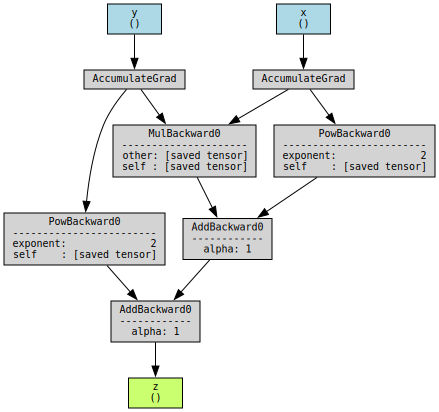

In [158]:
make_dot(z, params={'x': x, 'y': y, 'z': z}, show_attrs=True)